<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/SincRecurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def sinx_over_x_incremental_final(x, max_order=8):
    # Starting with the 0th term
    result = 1
    current_factorial = 1  # Starting with 0!
    coef = 1  # Coefficient for n=0

    # Use the recurrence relation to evaluate the polynomial and compute factorial incrementally
    for n in range(1, (max_order//2) + 1):
        # Update the factorial value for (2n+1)!
        current_factorial *= (2*n) * (2*n - 1) * (2*n + 1)

        # Calculate coefficient using the formula
        coef *= (-1) / (2*n * (2*n - 1) * (2*n + 1))

        # Update result using Horner's method
        result = coef + x**2 * result

    return result

def sinx_over_x_dynamic_coefficients_corrected(x, max_order=8):
    # Initialize result to the highest order coefficient
    result = (-1)**(max_order//2) / factorial(max_order + 1)

    # Use the recurrence relation to evaluate the polynomial
    for n in reversed(range(max_order//2)):
        coef = (-1)**n / factorial(2*n + 1)
        result = coef + x * result

    return result

def sinx_over_x_recurrence(x):
    # Coefficients a_k for the series expansion of sin(x)/x up to x^8 term
    coefficients = [1, 0, -1/6, 0, 1/120, 0, -1/5040, 0, 1/362880]

    # Initialize the value to the highest order coefficient
    result = coefficients[-1]

    # Use the recurrence relation to evaluate the polynomial
    for coef in reversed(coefficients[:-1]):
        result = coef + x * result

    return result

def sinx_over_x_horners_optimized(x):
    x2 = x**2
    return 1 + x2 * (-1/6 + x2 * (1/120 + x2 * (-1/5040 + x2/362880)))

def sinx_over_x_horners(x):
    return 1 + x**2 * (-1/6 + x**2 * (1/120 + x**2 * (-1/5040 + x**2/362880)))


from sympy import symbols, sin, series
# Define the variable
x = symbols('x')
# Compute the series expansion
sinx_over_x_series = series(sin(x)/x, x, 0, 10).removeO()

from sympy import horner
# Compute the Horner representation
horner_representation = horner(sinx_over_x_series)



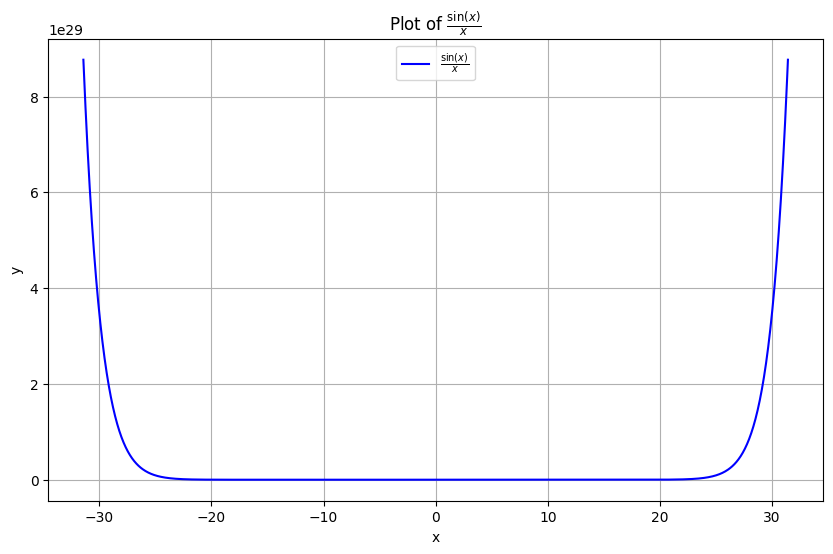

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values for plotting
x_values = np.linspace(-10*np.pi, 10*np.pi, 1000)

# Compute the corresponding y values using the sinx_over_x_incremental_final function
y_values = [sinx_over_x_incremental_final(x_val,20) for x_val in x_values]

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$\frac{\sin(x)}{x}$', color='blue')
plt.title(r'Plot of $\frac{\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
